In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key
import time
from scipy.stats import linregress

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

80.92228195564644 63.01521967165547
-78.76101579148819 -115.94560899427923
-42.68747870162807 16.990709949941277
35.5214677457991 -151.95364223675477
-12.126444760806805 119.18819356698191
23.13845218830464 -22.28530798706501
59.649463294936794 37.90275879917053
-45.501154541635856 -14.326380671969702
-0.16659112449704594 -174.0282776696867
-51.06454209923526 10.556696903916531
-78.30051240381357 -124.55385160027616
81.7467720905708 -82.42206841709506
-9.869824724085674 -76.97937715943
69.37324771251849 71.10814228736115
22.681366629174633 69.4752695630724
-40.837157765942074 28.707898831394175
-45.71209138880467 -120.74377143687614
-61.824493409990055 171.20955923534922
-14.348969748969054 148.02704195182457
-47.2896079385329 36.19571649252947
-14.37352175384251 6.31876380149879
-59.33046807632309 159.7751576650312
48.62419196482273 169.25673480379112
71.56101065928112 -12.83837191822272
-87.61673031996841 -170.62497271430095
-18.805983151975383 -18.306153476378626
-64.25771450615304 

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | ahuimanu
Processing Record 5 of Set 1 | waingapu
Processing Record 6 of Set 1 | nouadhibou
Processing Record 7 of Set 1 | kuzino
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | huallanca
Processing Record 13 of Set 1 | yar-sale
Processing Record 14 of Set 1 | mundra
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | cairns
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | husavik
Processing Record 22 of Set 1 | 

Processing Record 38 of Set 4 | kavieng
Processing Record 39 of Set 4 | west bay
Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | pochutla
Processing Record 42 of Set 4 | udachnyy
Processing Record 43 of Set 4 | praia
Processing Record 44 of Set 4 | avarua
Processing Record 45 of Set 4 | conde
Processing Record 46 of Set 4 | verkhnyaya inta
Processing Record 47 of Set 4 | katsuura
Processing Record 48 of Set 4 | balaipungut
Processing Record 49 of Set 4 | mobaye
Processing Record 50 of Set 4 | gizo
Processing Record 1 of Set 5 | lorengau
Processing Record 2 of Set 5 | anori
Processing Record 3 of Set 5 | atascocita
Processing Record 4 of Set 5 | tabou
Processing Record 5 of Set 5 | ust-omchug
Processing Record 6 of Set 5 | rocha
Processing Record 7 of Set 5 | dicabisagan
Processing Record 8 of Set 5 | wonthaggi
Processing Record 9 of Set 5 | vao
Processing Record 10 of Set 5 | china
Processing Record 11 of Set 5 | agua dulce
Processing Record 12 of Set 5 | pachino

Processing Record 27 of Set 8 | nazilli
Processing Record 28 of Set 8 | chagda
City not found. Skipping...
Processing Record 29 of Set 8 | faya
Processing Record 30 of Set 8 | kjollefjord
Processing Record 31 of Set 8 | urengoy
Processing Record 32 of Set 8 | inta
Processing Record 33 of Set 8 | sitka
Processing Record 34 of Set 8 | san cristobal
Processing Record 35 of Set 8 | ushtobe
Processing Record 36 of Set 8 | cervo
Processing Record 37 of Set 8 | plouzane
Processing Record 38 of Set 8 | ylivieska
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | kohat
Processing Record 41 of Set 8 | luanshya
Processing Record 42 of Set 8 | spitsevka
Processing Record 43 of Set 8 | lukovetskiy
Processing Record 44 of Set 8 | ossora
Processing Record 45 of Set 8 | karaul
City not found. Skipping...
Processing Record 46 of Set 8 | nuevo progreso
Processing Record 47 of Set 8 | shemgang
Processing Record 48 of Set 8 | buala
Processing Record 49 of Set 8 | jalingo
Processing Re

Processing Record 17 of Set 12 | huarmey
Processing Record 18 of Set 12 | mandera
Processing Record 19 of Set 12 | san martin
Processing Record 20 of Set 12 | bansi
Processing Record 21 of Set 12 | dunedin
Processing Record 22 of Set 12 | adrar
Processing Record 23 of Set 12 | carbondale
Processing Record 24 of Set 12 | estelle
Processing Record 25 of Set 12 | manokwari
Processing Record 26 of Set 12 | svetlogorsk
Processing Record 27 of Set 12 | sarab
Processing Record 28 of Set 12 | dargaville
Processing Record 29 of Set 12 | sao domingos
Processing Record 30 of Set 12 | talbahat
Processing Record 31 of Set 12 | bowen
Processing Record 32 of Set 12 | egvekinot
Processing Record 33 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 34 of Set 12 | lake cowichan
Processing Record 35 of Set 12 | gotsu
Processing Record 36 of Set 12 | honolulu
Processing Record 37 of Set 12 | challans
Processing Record 38 of Set 12 | viligili
City not found. Skipping...
Processing R

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,33.91,80,40,17.27,CL,2022-06-09 00:46:45
1,Hermanus,-34.4187,19.2345,62.80,86,0,10.27,ZA,2022-06-09 00:46:45
2,Ahuimanu,21.4447,-157.8378,85.75,60,75,14.97,US,2022-06-09 00:46:45
3,Waingapu,-9.6567,120.2641,83.37,71,39,13.31,ID,2022-06-09 00:46:46
4,Nouadhibou,20.9310,-17.0347,67.98,83,100,10.36,MR,2022-06-09 00:46:46
5,Kuzino,57.0224,59.4412,46.87,96,100,1.39,RU,2022-06-09 00:46:46
6,Jamestown,42.0970,-79.2353,64.04,61,0,5.75,US,2022-06-09 00:46:47
7,Rikitea,-23.1203,-134.9692,72.79,65,100,14.38,PF,2022-06-09 00:46:47
8,Qaanaaq,77.4840,-69.3632,29.93,93,100,2.93,GL,2022-06-09 00:46:48
9,Huallanca,-9.8993,-76.9417,46.85,87,99,2.80,PE,2022-06-09 00:46:48


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-06-09 00:46:45,-53.1500,-70.9167,33.91,80,40,17.27
1,Hermanus,ZA,2022-06-09 00:46:45,-34.4187,19.2345,62.80,86,0,10.27
2,Ahuimanu,US,2022-06-09 00:46:45,21.4447,-157.8378,85.75,60,75,14.97
3,Waingapu,ID,2022-06-09 00:46:46,-9.6567,120.2641,83.37,71,39,13.31
4,Nouadhibou,MR,2022-06-09 00:46:46,20.9310,-17.0347,67.98,83,100,10.36
5,Kuzino,RU,2022-06-09 00:46:46,57.0224,59.4412,46.87,96,100,1.39
6,Jamestown,US,2022-06-09 00:46:47,42.0970,-79.2353,64.04,61,0,5.75
7,Rikitea,PF,2022-06-09 00:46:47,-23.1203,-134.9692,72.79,65,100,14.38
8,Qaanaaq,GL,2022-06-09 00:46:48,77.4840,-69.3632,29.93,93,100,2.93
9,Huallanca,PE,2022-06-09 00:46:48,-9.8993,-76.9417,46.85,87,99,2.80


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
output_data_file = "weather_data/cities.csv"

city_data_df = pd.read_csv(output_data_file)

In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

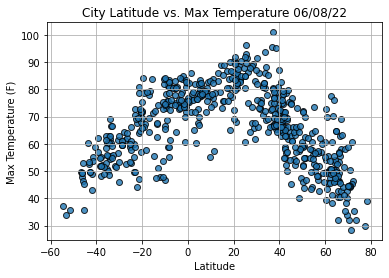

In [7]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

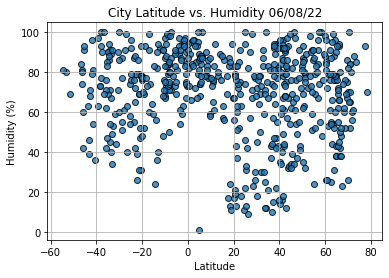

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

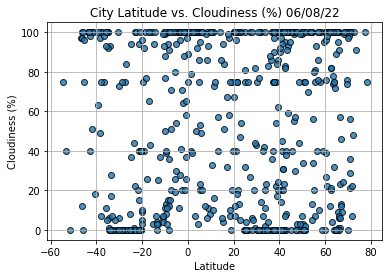

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


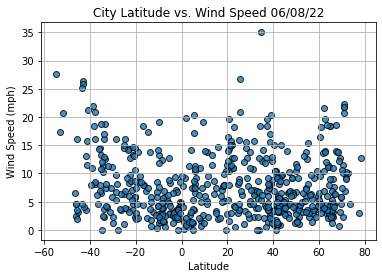

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"R value is {r_value} and p-value is {p_value}")

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

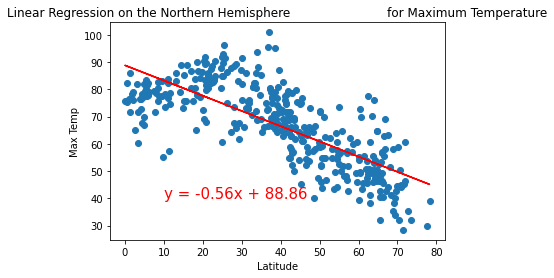

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

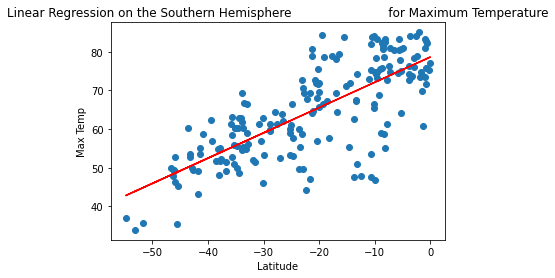

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

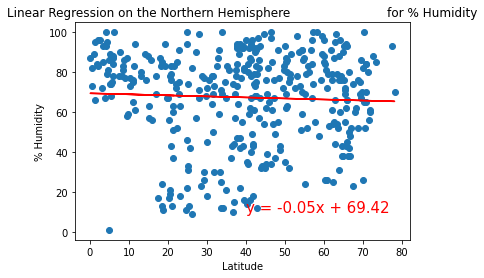

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

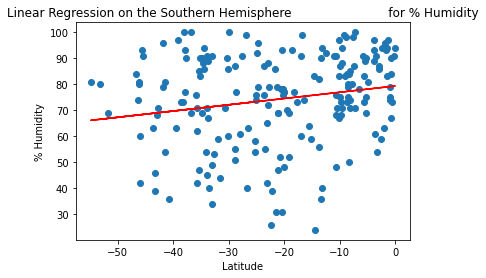

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

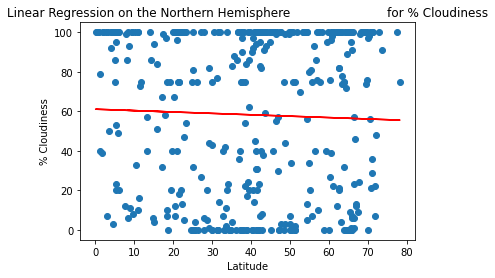

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(100,0))

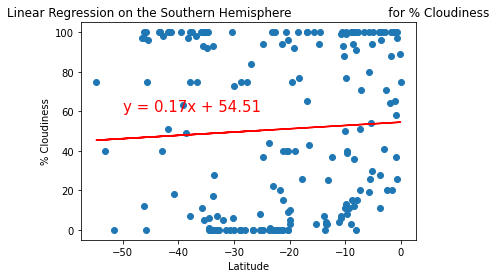

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

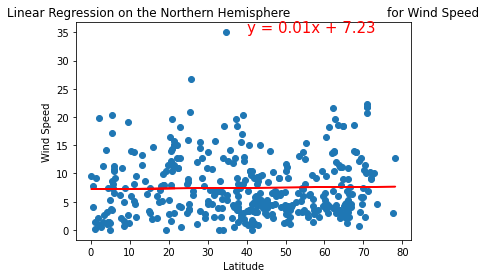

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [8]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))


NameError: name 'southern_hemi_df' is not defined